# Trend maps of GLORYS `ssh`, `u`, `v` (1993-2021)

In [1]:
import xarray as xr
import json
import gcsfs
import numpy as np
import cmocean
import cartopy.crs as ccrs #cartopy coord ref sys
import cartopy
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [2]:
glorys = xr.open_dataset('cmems_mod_glo_phy_my_0.083deg_P1D-m.nc')

In [3]:
glorys

<xarray.Dataset> Size: 14GB
Dimensions:    (depth: 1, latitude: 169, longitude: 337, time: 10408)
Coordinates:
  * depth      (depth) float32 4B 0.494
  * latitude   (latitude) float32 676B 17.0 17.08 17.17 ... 30.83 30.92 31.0
  * longitude  (longitude) float32 1kB -100.0 -99.92 -99.83 ... -72.08 -72.0
  * time       (time) datetime64[ns] 83kB 1993-01-01 1993-01-02 ... 2021-06-30
Data variables:
    zos        (time, latitude, longitude) float64 5GB ...
    uo         (time, depth, latitude, longitude) float64 5GB ...
    vo         (time, depth, latitude, longitude) float64 5GB ...
Attributes:
    source:       MERCATOR GLORYS12V1
    institution:  MERCATOR OCEAN
    references:   http://www.mercator-ocean.fr
    Conventions:  CF-1.4
    title:        daily mean fields from Global Ocean Physics Analysis and Fo...
    comment:      CMEMS product
    history:      2023/06/01 16:20:05 MERCATOR OCEAN Netcdf creation

In [4]:
gom = dict(longitude=slice(-98, -81), latitude=slice(17.5, 31))
ds = glorys.sel(**gom).isel(depth=0)

In [5]:
ds

<xarray.Dataset> Size: 8GB
Dimensions:    (latitude: 163, longitude: 205, time: 10408)
Coordinates:
    depth      float32 4B 0.494
  * latitude   (latitude) float32 652B 17.5 17.58 17.67 ... 30.83 30.92 31.0
  * longitude  (longitude) float32 820B -98.0 -97.92 -97.83 ... -81.08 -81.0
  * time       (time) datetime64[ns] 83kB 1993-01-01 1993-01-02 ... 2021-06-30
Data variables:
    zos        (time, latitude, longitude) float64 3GB ...
    uo         (time, latitude, longitude) float64 3GB ...
    vo         (time, latitude, longitude) float64 3GB ...
Attributes:
    source:       MERCATOR GLORYS12V1
    institution:  MERCATOR OCEAN
    references:   http://www.mercator-ocean.fr
    Conventions:  CF-1.4
    title:        daily mean fields from Global Ocean Physics Analysis and Fo...
    comment:      CMEMS product
    history:      2023/06/01 16:20:05 MERCATOR OCEAN Netcdf creation

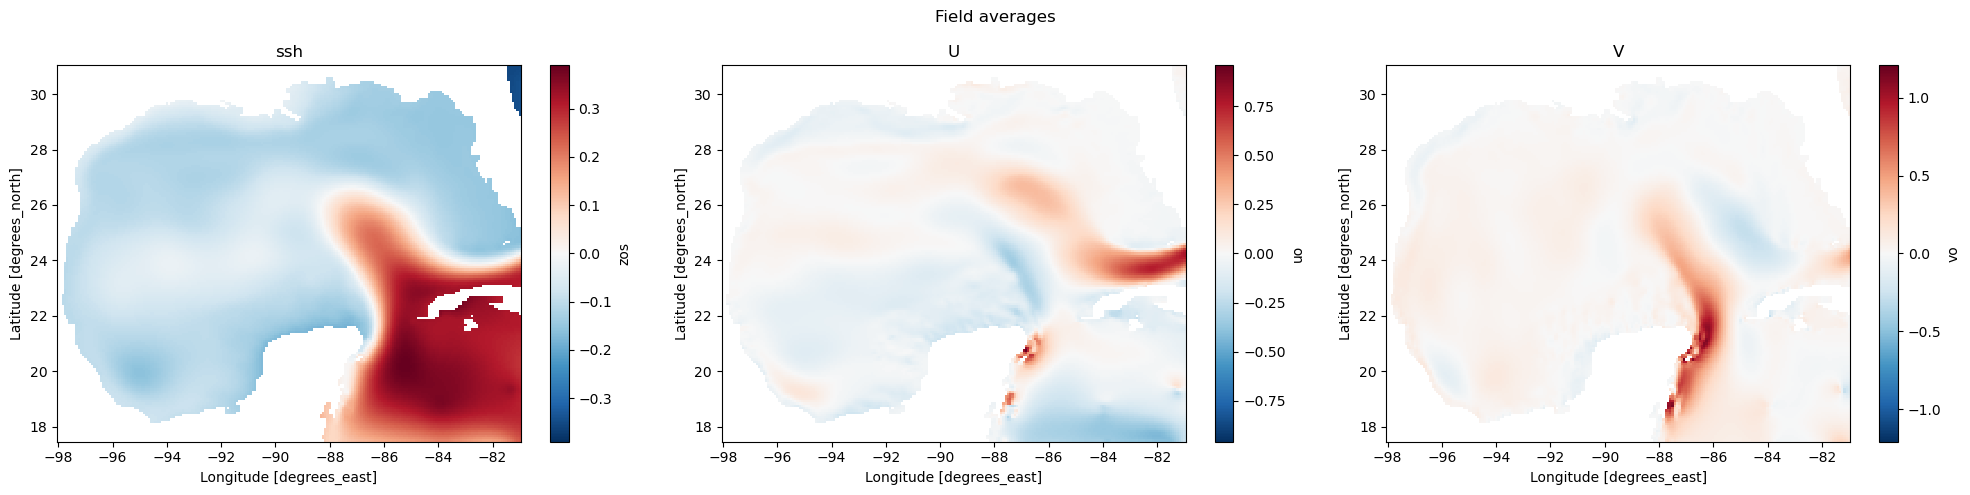

In [7]:
fig, ax = plt.subplots(1,3, figsize=(20,5))
ds.zos.mean('time').plot(ax=ax[0])
ax[0].set_title('ssh')
ds.uo.mean('time').plot(ax=ax[1])
ax[1].set_title('U')
ds.vo.mean('time').plot(ax=ax[2])
ax[2].set_title('V')
plt.suptitle('Field averages')
plt.tight_layout();

In [12]:
ssh = ds.zos.drop_vars('depth')
u = ds.uo
v = ds.vo

In [13]:
ssh

<xarray.DataArray 'zos' (time: 10408, latitude: 163, longitude: 205)> Size: 3GB
array([[[      nan,       nan, ...,  0.176092,  0.180059],
        [      nan,       nan, ...,  0.180059,  0.184027],
        ...,
        [      nan,       nan, ..., -0.406507, -0.404675],
        [      nan,       nan, ..., -0.408643, -0.407422]],

       [[      nan,       nan, ...,  0.165716,  0.170598],
        [      nan,       nan, ...,  0.169683,  0.174871],
        ...,
        [      nan,       nan, ..., -0.237129, -0.251167],
        [      nan,       nan, ..., -0.231025, -0.245674]],

       ...,

       [[      nan,       nan, ...,  0.26368 ,  0.266732],
        [      nan,       nan, ...,  0.273446,  0.275887],
        ...,
        [      nan,       nan, ..., -0.284127, -0.290231],
        [      nan,       nan, ..., -0.283212, -0.289926]],

       [[      nan,       nan, ...,  0.257881,  0.259102],
        [      nan,       nan, ...,  0.268563,  0.268258],
        ...,
        [      nan,       nan, ..., -0.343944, -0.34608 ],
        [      nan,       nan, ..., -0.343638, -0.346385]]])
Coordinates:
  * latitude   (latitude) float32 652B 17.5 17.58 17.67 ... 30.83 30.92 31.0
  * longitude  (longitude) float32 820B -98.0 -97.92 -97.83 ... -81.08 -81.0
  * time       (time) datetime64[ns] 83kB 1993-01-01 1993-01-02 ... 2021-06-30
Attributes:
    standard_name:  sea_surface_height_above_geoid
    units:          m
    valid_max:      5684
    unit_long:      Meters
    long_name:      Sea surface height
    valid_min:      -6228

In [15]:
ssh.groupby('time.month')

<DataArrayGroupBy, grouped over 1 grouper(s), 12 groups in total:
    'month': 12/12 groups present with labels 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12>